In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

In [3]:

# look at the data
print(data)
print(data.shape)

NameError: name 'data' is not defined

In [6]:
# load the data
data = np.loadtxt('ECGU.txt')

# look at the data
print(data)
print(data.shape)

[[-275. -119. -119.]
 [-275. -119. -119.]
 [-275. -118. -121.]
 ...
 [  -4.  -83.   21.]
 [  -9.  -88.   31.]
 [ -16.  -96.   33.]]
(6500, 3)


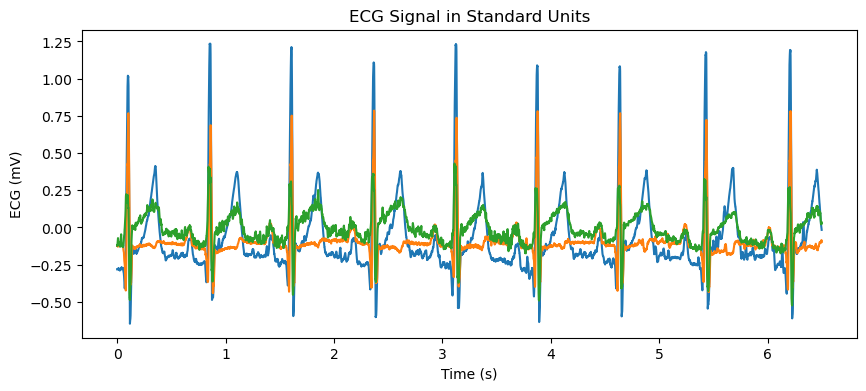

In [7]:
# load the data
data = np.loadtxt('ECGU.txt')

# Convert ECG raw data to millivolts (mV)
ecg_mV = data * 1024e-6  # 1024 µV = 1024e-6 V = 1.024 mV per unit

# Create time axis in seconds
num_samples = data.shape[0]
sampling_freq = 1000  # Hz
time = np.arange(num_samples) / sampling_freq

# Plot the ECG data
plt.figure(figsize=(10, 4))
plt.plot(time, ecg_mV)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG Signal in Standard Units')
plt.show()

renamed Data.

Text(0.5, 1.0, 'ECG Signal in Standard Units')

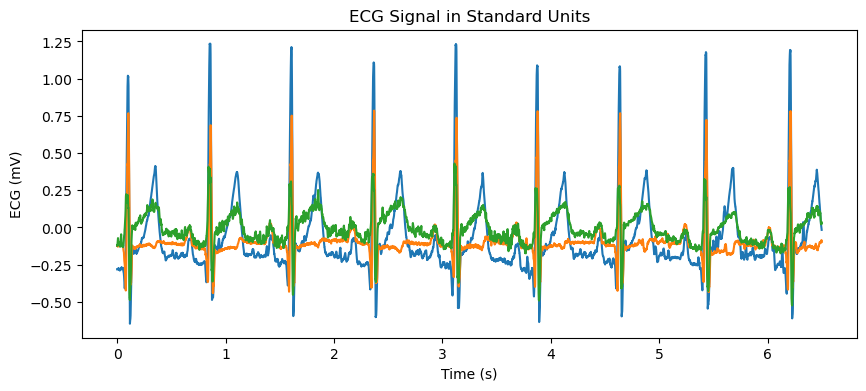

In [8]:
def load_and_convert_ecg(filename, gain_per_unit=1024e-6, sampling_frequency=1000):
    """
    Load ECG raw data from a text file, convert to millivolts, and create time axis in seconds.
    
    Parameters:
        filename (str): Path to the ECG data file.
        gain_per_unit (float): Conversion factor from raw units to volts (default: 1024 µV per unit).
        sampling_frequency (int): Sampling frequency in Hz (default: 1000 Hz).
    
    Returns:
        time_axis (np.ndarray): Time axis in seconds.
        ecg_millivolts (np.ndarray): ECG data in millivolts.
    """
    ecg_raw_data = np.loadtxt(filename)
    ecg_millivolts = ecg_raw_data * gain_per_unit
    num_samples = ecg_raw_data.shape[0]
    time_axis = np.arange(num_samples) / sampling_frequency
    return time_axis, ecg_millivolts

# Load and convert ECG data
time_axis, ecg_millivolts = load_and_convert_ecg('ECGU.txt')

# Plot the ECG data
plt.figure(figsize=(10, 4))
plt.plot(time_axis, ecg_millivolts)
plt.xlabel('Time (s)')
plt.ylabel('ECG (mV)')
plt.title('ECG Signal in Standard Units')